In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,auc
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import plot_confusion_matrix

In [87]:
from sklearn.metrics import classification_report , confusion_matrix

In [5]:
rain=pd.read_csv('weatherAUS.csv')

In [37]:
rain

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ...        71.0   
1            NaN         WNW           44.0        NNW  ...        44.0   
2            NaN         WSW           46.0          W  ...        38.0   
3            NaN          NE           24.0         SE  ...        45.0   
4            NaN           W           41.0        ENE  ...        82.0   
...          ...         ...            ...        ...  ...         ...   
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   
145459       NaN         NaN            NaN        ESE  ...        62.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              22.0       1007.7       1007.1       8.0       NaN     16.9   
1              25.0       1010.6       1007.8       NaN       NaN     17.2   
2              30.0       1007.6       1008.7       NaN       2.0     21.0   
3              16.0       1017.6       1012.8       NaN       NaN     18.1   
4              33.0       1010.8       1006.0       7.0       8.0     17.8   
...             ...          ...          ...       ...       ...      ...   
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   
145459         36.0       1020.2       1017.9       8.0       8.0     15.0   

        Temp3pm  RainToday  RainTomorrow  
0          21.8         No            No  
1          24.3         No            No  
2          23.2         No            No  
3          26.5         No            No  
4          29.7         No            No  
...         ...        ...           ...  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  
145459     20.9         No           NaN  

[145460 rows x 23 columns]

In [38]:
rain.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [39]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [40]:
rain.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.000000      13.000000   
50%        8.400000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm   Pressure9am    Pressure3pm  \
count  142806.000000  140953.000000  130395.00000  130432.000000   
mean       68.880831      51.539116    1017.64994    1015.255889   
std        19.029164      20.795902       7.10653       7.037414   
min         0.000000       0.000000     980.50000     977.100000   
25%        57.000000      37.000000    1012.90000    1010.400000   
50%        70.000000      52.000000    1017.60000    1015.200000   
75%        83.000000      66.000000    1022.40000    1020.000000   
max       100.000000     100.000000    1041.00000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am       Temp3pm  
count  89572.000000  86102.000000  143693.000000  141851.00000  
mean       4.447461      4.509930      16.990631      21.68339  
std        2.887159      2.720357       6.488753       6.93665  
min        0.000000      0.000000      -7.200000      -5.40000  
25%        1.000000      2.000000      12.300000      16.60000  
50%        5.000000      5.000000      16.700000      21.10000  
75%        7.000000      7.000000      21.600000      26.40000  
max        9.000000      9.000000      40.200000      46.70000

In [41]:
rain.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [42]:
(rain.isna().sum()/rain.shape[0])*100

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [43]:
rain.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          681
Evaporation       358
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           441
Temp3pm           502
RainToday           2
RainTomorrow        2
dtype: int64

In [44]:
rain.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [45]:
rain_df=rain.dropna(axis = "index", subset = ['MinTemp', 'MaxTemp', 'Rainfall','WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm','Pressure9am', 'Pressure3pm','Temp9am','Temp3pm', 'RainToday', 'RainTomorrow'])

In [46]:
rain_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145454  2017-06-20    Uluru      3.5     21.8       0.0          NaN   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ...        71.0   
1            NaN         WNW           44.0        NNW  ...        44.0   
2            NaN         WSW           46.0          W  ...        38.0   
3            NaN          NE           24.0         SE  ...        45.0   
4            NaN           W           41.0        ENE  ...        82.0   
...          ...         ...            ...        ...  ...         ...   
145454       NaN           E           31.0        ESE  ...        59.0   
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              22.0       1007.7       1007.1       8.0       NaN     16.9   
1              25.0       1010.6       1007.8       NaN       NaN     17.2   
2              30.0       1007.6       1008.7       NaN       2.0     21.0   
3              16.0       1017.6       1012.8       NaN       NaN     18.1   
4              33.0       1010.8       1006.0       7.0       8.0     17.8   
...             ...          ...          ...       ...       ...      ...   
145454         27.0       1024.7       1021.2       NaN       NaN      9.4   
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   

        Temp3pm  RainToday  RainTomorrow  
0          21.8         No            No  
1          24.3         No            No  
2          23.2         No            No  
3          26.5         No            No  
4          29.7         No            No  
...         ...        ...           ...  
145454     20.9         No            No  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  

[112925 rows x 23 columns]

In [47]:
rain_df.isna().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation      41144
Sunshine         46279
WindGustDir          0
WindGustSpeed        0
WindDir9am           0
WindDir3pm           0
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am         37310
Cloud3pm         38646
Temp9am              0
Temp3pm              0
RainToday            0
RainTomorrow         0
dtype: int64

In [48]:
rain_df.shape

(112925, 23)

In [49]:
rain_df_final=rain_df.drop(['Date','Evaporation','Sunshine','Cloud9am','Cloud3pm'], axis = 1)

In [50]:
rain_df_final

Location  MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed  \
0        Albury     13.4     22.9       0.6           W           44.0   
1        Albury      7.4     25.1       0.0         WNW           44.0   
2        Albury     12.9     25.7       0.0         WSW           46.0   
3        Albury      9.2     28.0       0.0          NE           24.0   
4        Albury     17.5     32.3       1.0           W           41.0   
...         ...      ...      ...       ...         ...            ...   
145454    Uluru      3.5     21.8       0.0           E           31.0   
145455    Uluru      2.8     23.4       0.0           E           31.0   
145456    Uluru      3.6     25.3       0.0         NNW           22.0   
145457    Uluru      5.4     26.9       0.0           N           37.0   
145458    Uluru      7.8     27.0       0.0          SE           28.0   

       WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  \
0               W        WNW          20.0          24.0         71.0   
1             NNW        WSW           4.0          22.0         44.0   
2               W        WSW          19.0          26.0         38.0   
3              SE          E          11.0           9.0         45.0   
4             ENE         NW           7.0          20.0         82.0   
...           ...        ...           ...           ...          ...   
145454        ESE          E          15.0          13.0         59.0   
145455         SE        ENE          13.0          11.0         51.0   
145456         SE          N          13.0           9.0         56.0   
145457         SE        WNW           9.0           9.0         53.0   
145458        SSE          N          13.0           7.0         51.0   

        Humidity3pm  Pressure9am  Pressure3pm  Temp9am  Temp3pm RainToday  \
0              22.0       1007.7       1007.1     16.9     21.8        No   
1              25.0       1010.6       1007.8     17.2     24.3        No   
2              30.0       1007.6       1008.7     21.0     23.2        No   
3              16.0       1017.6       1012.8     18.1     26.5        No   
4              33.0       1010.8       1006.0     17.8     29.7        No   
...             ...          ...          ...      ...      ...       ...   
145454         27.0       1024.7       1021.2      9.4     20.9        No   
145455         24.0       1024.6       1020.3     10.1     22.4        No   
145456         21.0       1023.5       1019.1     10.9     24.5        No   
145457         24.0       1021.0       1016.8     12.5     26.1        No   
145458         24.0       1019.4       1016.5     15.1     26.0        No   

       RainTomorrow  
0                No  
1                No  
2                No  
3                No  
4                No  
...             ...  
145454           No  
145455           No  
145456           No  
145457           No  
145458           No  

[112925 rows x 18 columns]

In [51]:
rain_df_final.shape

(112925, 18)

In [52]:
rain_df_final.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [53]:
rain_df_final.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [54]:
rain_df_final.nunique()

Location          44
MinTemp          377
MaxTemp          413
Rainfall         636
WindGustDir       16
WindGustSpeed     66
WindDir9am        16
WindDir3pm        16
WindSpeed9am      39
WindSpeed3pm      41
Humidity9am      101
Humidity3pm      101
Pressure9am      542
Pressure3pm      541
Temp9am          397
Temp3pm          415
RainToday          2
RainTomorrow       2
dtype: int64

In [55]:
rain_df_final.describe()

MinTemp        MaxTemp       Rainfall  WindGustSpeed  \
count  112925.000000  112925.000000  112925.000000  112925.000000   
mean       12.664721      23.655670       2.377892      40.786611   
std         6.254135       6.982702       8.602968      13.321774   
min        -8.200000       2.600000       0.000000       7.000000   
25%         8.100000      18.300000       0.000000      31.000000   
50%        12.400000      23.100000       0.000000      39.000000   
75%        17.200000      28.700000       0.800000      48.000000   
max        33.900000      48.100000     367.600000     135.000000   

        WindSpeed9am   WindSpeed3pm    Humidity9am    Humidity3pm  \
count  112925.000000  112925.000000  112925.000000  112925.000000   
mean       15.179163      19.500545      67.404162      50.669055   
std         8.344304       8.580097      18.911610      20.768550   
min         2.000000       2.000000       0.000000       0.000000   
25%         9.000000      13.000000      56.000000      36.000000   
50%        13.000000      19.000000      68.000000      51.000000   
75%        20.000000      24.000000      81.000000      65.000000   
max        87.000000      87.000000     100.000000     100.000000   

         Pressure9am    Pressure3pm        Temp9am        Temp3pm  
count  112925.000000  112925.000000  112925.000000  112925.000000  
mean     1017.425847    1015.048962      17.462008      22.127306  
std         7.032654       6.957822       6.355045       6.837380  
min       980.500000     977.100000      -3.100000       1.700000  
25%      1012.800000    1010.300000      12.700000      16.900000  
50%      1017.400000    1015.000000      17.100000      21.600000  
75%      1022.100000    1019.700000      22.000000      26.900000  
max      1041.000000    1039.600000      40.200000      46.700000

In [56]:
rain_df_final.corr()

MinTemp   MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  \
MinTemp        1.000000  0.728942  0.103807       0.159176      0.150577   
MaxTemp        0.728942  1.000000 -0.076825       0.056742     -0.006114   
Rainfall       0.103807 -0.076825  1.000000       0.130388      0.085376   
WindGustSpeed  0.159176  0.056742  0.130388       1.000000      0.589735   
WindSpeed9am   0.150577 -0.006114  0.085376       0.589735      1.000000   
WindSpeed3pm   0.146078  0.013976  0.060288       0.679223      0.499372   
Humidity9am   -0.218312 -0.517188  0.238756      -0.183729     -0.221500   
Humidity3pm    0.026733 -0.497679  0.259652      -0.020903     -0.017875   
Pressure9am   -0.433645 -0.312597 -0.167595      -0.445046     -0.201550   
Pressure3pm   -0.448298 -0.411360 -0.126520      -0.399751     -0.150433   
Temp9am        0.898785  0.884925  0.007418       0.124733      0.089493   
Temp3pm        0.704477  0.984357 -0.080376       0.018325     -0.019280   

               WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
MinTemp            0.146078    -0.218312     0.026733    -0.433645   
MaxTemp            0.013976    -0.517188    -0.497679    -0.312597   
Rainfall           0.060288     0.238756     0.259652    -0.167595   
WindGustSpeed      0.679223    -0.183729    -0.020903    -0.445046   
WindSpeed9am       0.499372    -0.221500    -0.017875    -0.201550   
WindSpeed3pm       1.000000    -0.093364     0.053916    -0.284036   
Humidity9am       -0.093364     1.000000     0.684373     0.115345   
Humidity3pm        0.053916     0.684373     1.000000    -0.035468   
Pressure9am       -0.284036     0.115345    -0.035468     1.000000   
Pressure3pm       -0.244390     0.168052     0.046073     0.960248   
Temp9am            0.126778    -0.464487    -0.202107    -0.400133   
Temp3pm           -0.011471    -0.510028    -0.547120    -0.270662   

               Pressure3pm   Temp9am   Temp3pm  
MinTemp          -0.448298  0.898785  0.704477  
MaxTemp          -0.411360  0.884925  0.984357  
Rainfall         -0.126520  0.007418 -0.080376  
WindGustSpeed    -0.399751  0.124733  0.018325  
WindSpeed9am     -0.150433  0.089493 -0.019280  
WindSpeed3pm     -0.244390  0.126778 -0.011471  
Humidity9am       0.168052 -0.464487 -0.510028  
Humidity3pm       0.046073 -0.202107 -0.547120  
Pressure9am       0.960248 -0.400133 -0.270662  
Pressure3pm       1.000000 -0.453075 -0.378574  
Temp9am          -0.453075  1.000000  0.859910  
Temp3pm          -0.378574  0.859910  1.000000

<AxesSubplot:>

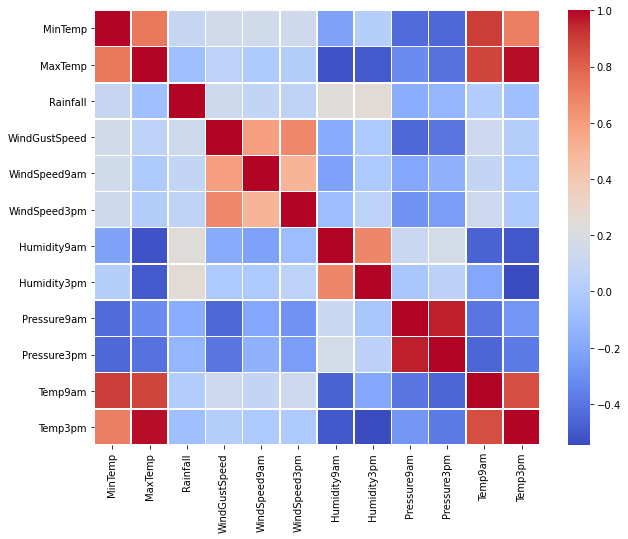

In [57]:
plt.figure(figsize=(10,8))
sns.heatmap(rain_df_final.corr(), linewidths=0.5, annot=False, fmt=".2f", cmap = 'coolwarm')

In [58]:
categorical_features = [column_name for column_name in rain.columns if rain[column_name].dtype == 'O']
print("Number of Categorical Features: {}".format(len(categorical_features)))
print("Categorical Features: ",categorical_features)

Number of Categorical Features: 7
Categorical Features:  ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [59]:
numerical_features = [column_name for column_name in rain.columns if rain[column_name].dtype != 'O']
print("Number of Numerical Features: {}".format(len(numerical_features)))
print("Numerical Features: ",numerical_features)

Number of Numerical Features: 16
Numerical Features:  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


<AxesSubplot:>

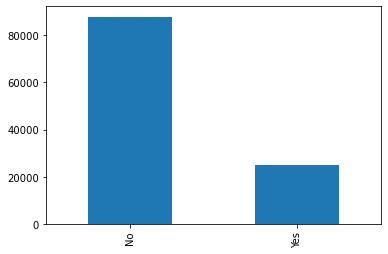

In [60]:
rain_df_final['RainTomorrow'].value_counts().plot(kind='bar')

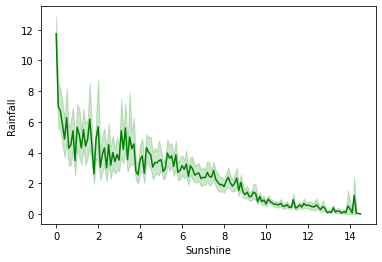

In [61]:
sns.lineplot(data=rain,x='Sunshine',y='Rainfall',color='green')
plt.show()

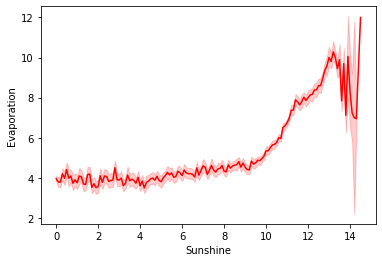

In [62]:
sns.lineplot(data=rain,x='Sunshine',y='Evaporation',color='red')
plt.show()

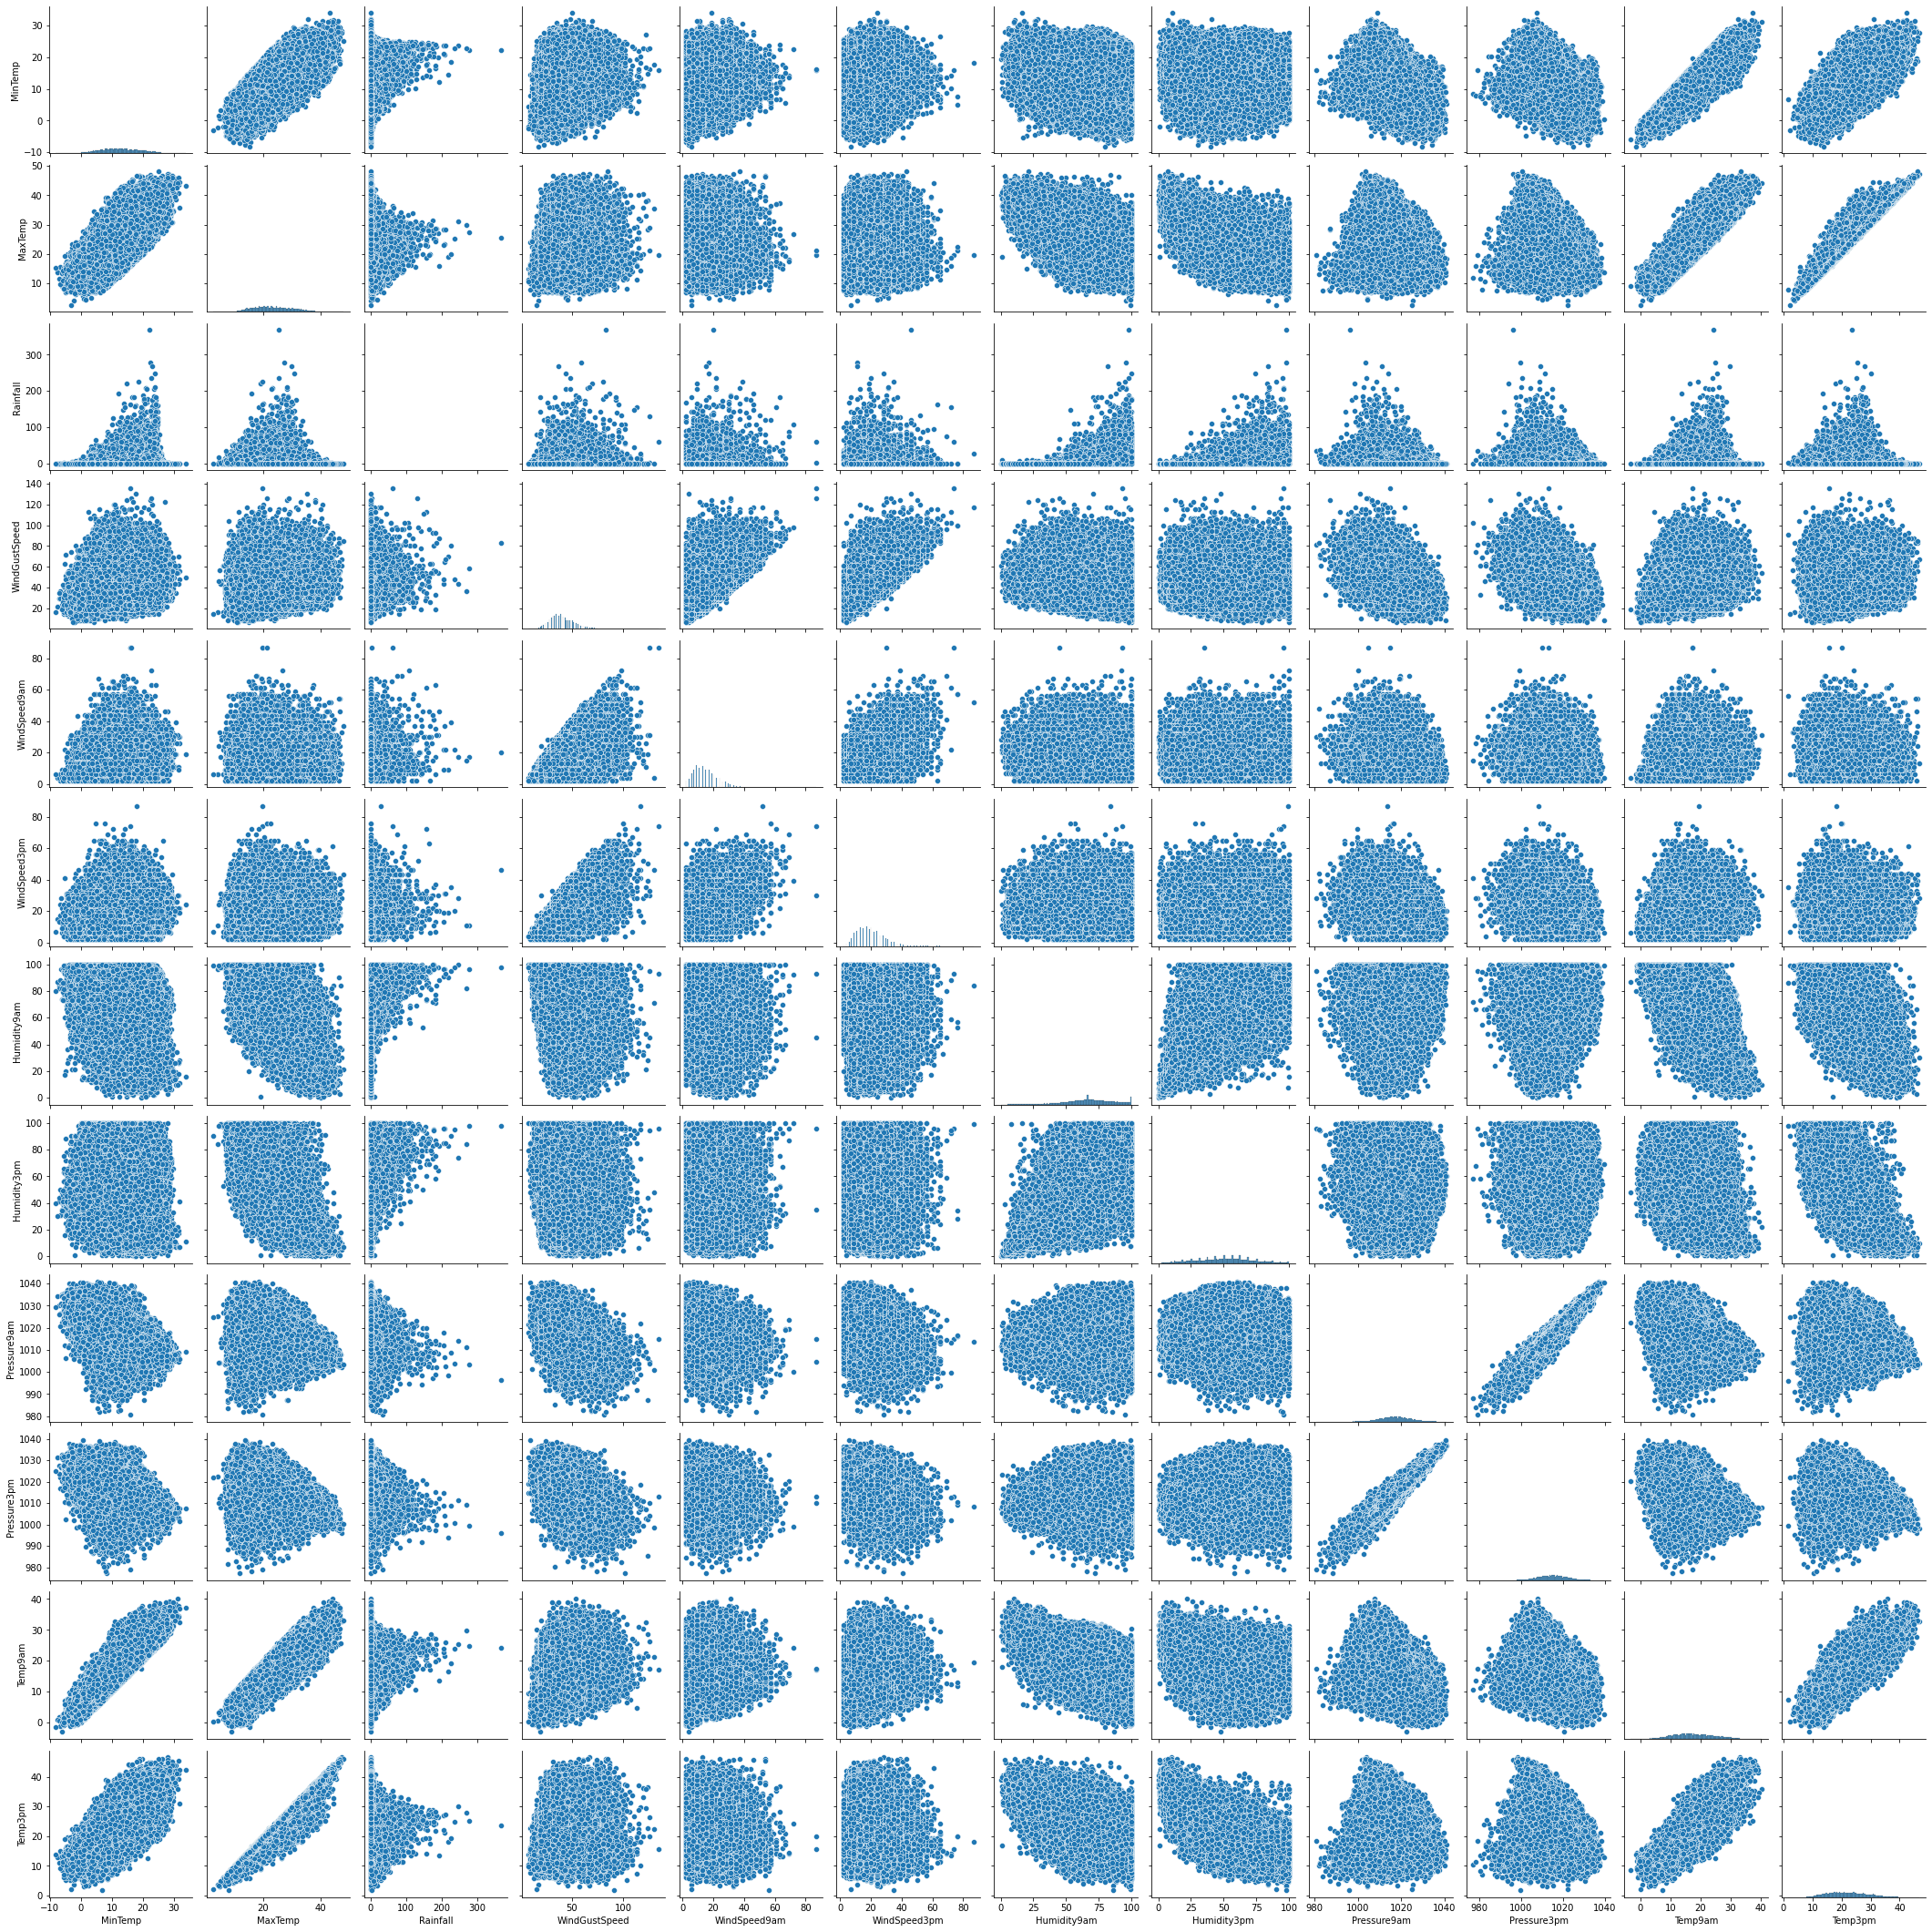

In [131]:
sns.pairplot(data=rain_df_final )

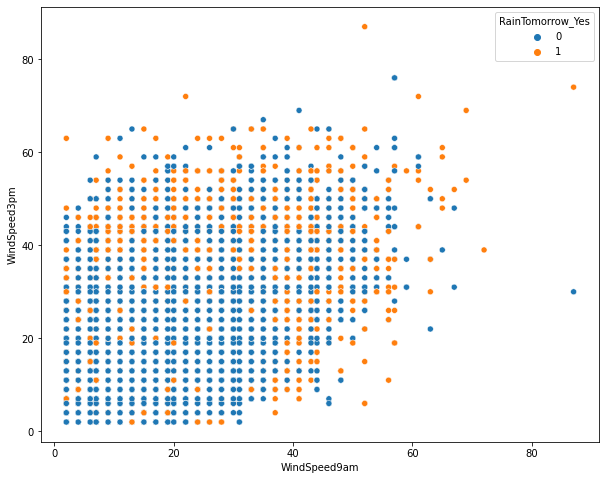

In [148]:
plt.figure(figsize = (10,8))
sns.scatterplot(x = "WindSpeed9am",y = "WindSpeed3pm",hue = "RainTomorrow_Yes",data = df1)
plt.show()

<AxesSubplot:xlabel='Pressure9am', ylabel='Pressure3pm'>

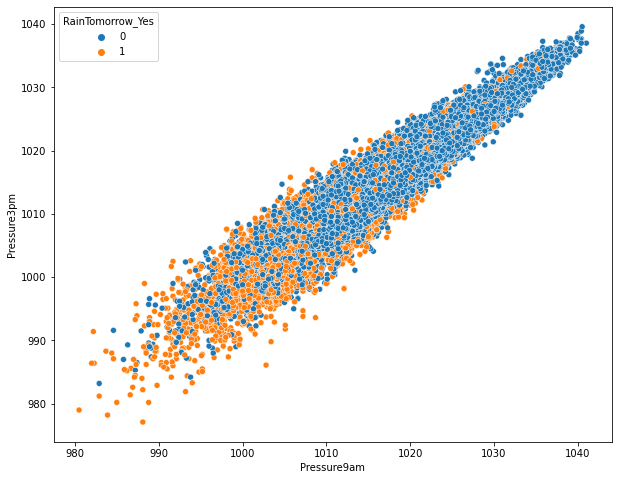

In [149]:
plt.figure(figsize = (10,8))
sns.scatterplot(x = "Pressure9am",y = "Pressure3pm",hue = "RainTomorrow_Yes",data = df1)

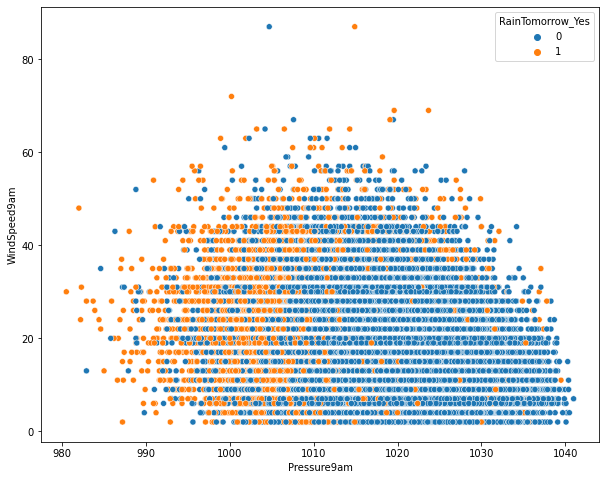

In [150]:
plt.figure(figsize = (10,8))
sns.scatterplot(x = "Pressure9am",y = "WindSpeed9am",hue = "RainTomorrow_Yes",data = df1)
plt.show()

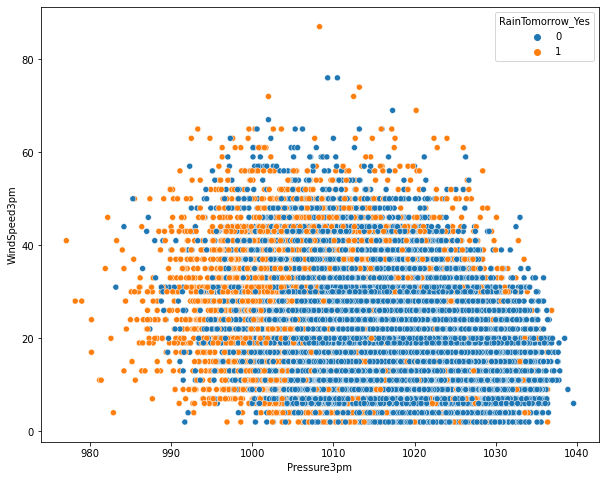

In [162]:
plt.figure(figsize = (10,8))
sns.scatterplot(x = "Pressure3pm",y = "WindSpeed3pm",hue = "RainTomorrow_Yes",data = df1)
plt.show()

<AxesSubplot:xlabel='WindGustSpeed', ylabel='Rainfall'>

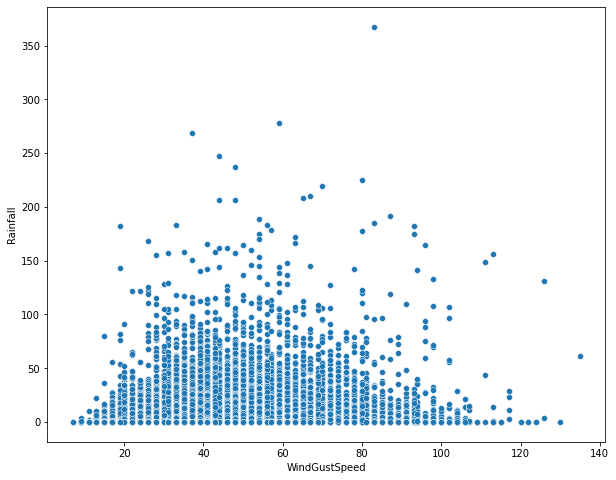

In [161]:
sns.scatterplot(x = "WindGustSpeed",y="Rainfall",data = df1)

<AxesSubplot:xlabel='Temp3pm', ylabel='Temp9am'>

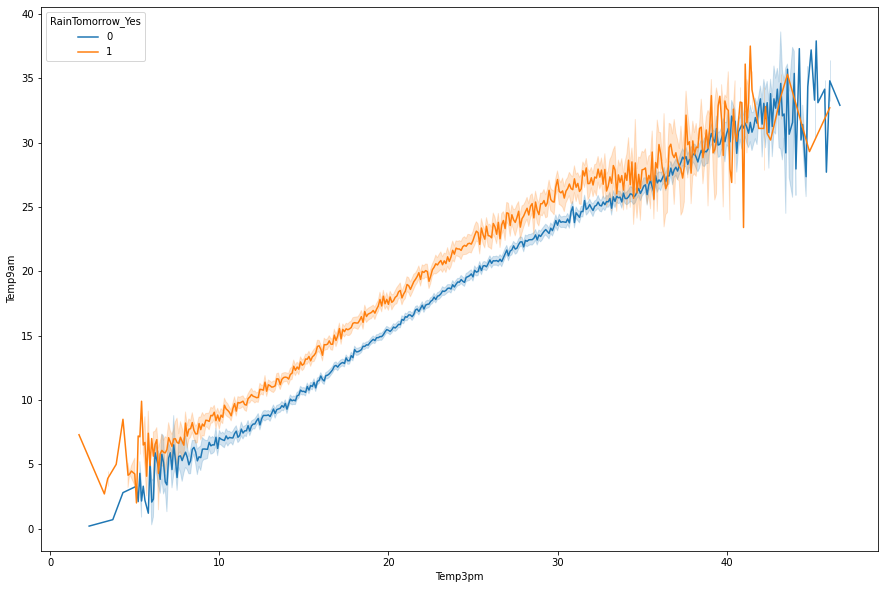

In [163]:
plt.figure(figsize = (15,10))
sns.lineplot(x = "Temp3pm",y = "Temp9am", hue = "RainTomorrow_Yes",data = df1)

<AxesSubplot:xlabel='MaxTemp'>

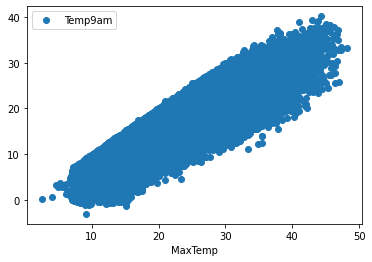

In [63]:
rain_df_final.plot('MaxTemp','Temp9am',style='o')

[]

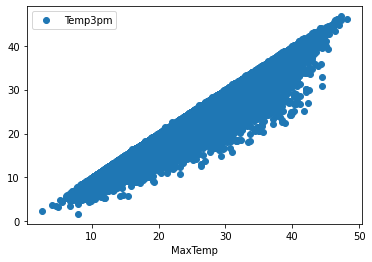

In [66]:
rain_df_final.plot('MaxTemp','Temp3pm',style='o').plot()

In [67]:
df1 = pd.get_dummies(data=rain_df_final, columns=['RainToday', 'RainTomorrow'], drop_first=True)

In [68]:
df1

Location  MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed  \
0        Albury     13.4     22.9       0.6           W           44.0   
1        Albury      7.4     25.1       0.0         WNW           44.0   
2        Albury     12.9     25.7       0.0         WSW           46.0   
3        Albury      9.2     28.0       0.0          NE           24.0   
4        Albury     17.5     32.3       1.0           W           41.0   
...         ...      ...      ...       ...         ...            ...   
145454    Uluru      3.5     21.8       0.0           E           31.0   
145455    Uluru      2.8     23.4       0.0           E           31.0   
145456    Uluru      3.6     25.3       0.0         NNW           22.0   
145457    Uluru      5.4     26.9       0.0           N           37.0   
145458    Uluru      7.8     27.0       0.0          SE           28.0   

       WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  \
0               W        WNW          20.0          24.0         71.0   
1             NNW        WSW           4.0          22.0         44.0   
2               W        WSW          19.0          26.0         38.0   
3              SE          E          11.0           9.0         45.0   
4             ENE         NW           7.0          20.0         82.0   
...           ...        ...           ...           ...          ...   
145454        ESE          E          15.0          13.0         59.0   
145455         SE        ENE          13.0          11.0         51.0   
145456         SE          N          13.0           9.0         56.0   
145457         SE        WNW           9.0           9.0         53.0   
145458        SSE          N          13.0           7.0         51.0   

        Humidity3pm  Pressure9am  Pressure3pm  Temp9am  Temp3pm  \
0              22.0       1007.7       1007.1     16.9     21.8   
1              25.0       1010.6       1007.8     17.2     24.3   
2              30.0       1007.6       1008.7     21.0     23.2   
3              16.0       1017.6       1012.8     18.1     26.5   
4              33.0       1010.8       1006.0     17.8     29.7   
...             ...          ...          ...      ...      ...   
145454         27.0       1024.7       1021.2      9.4     20.9   
145455         24.0       1024.6       1020.3     10.1     22.4   
145456         21.0       1023.5       1019.1     10.9     24.5   
145457         24.0       1021.0       1016.8     12.5     26.1   
145458         24.0       1019.4       1016.5     15.1     26.0   

        RainToday_Yes  RainTomorrow_Yes  
0                   0                 0  
1                   0                 0  
2                   0                 0  
3                   0                 0  
4                   0                 0  
...               ...               ...  
145454              0                 0  
145455              0                 0  
145456              0                 0  
145457              0                 0  
145458              0                 0  

[112925 rows x 18 columns]

In [69]:
df1.sample(10)

Location  MinTemp  MaxTemp  Rainfall WindGustDir  \
61289               Sale      7.3     21.1       0.0         WSW   
60292            Bendigo      8.2     23.7       0.0         SSE   
3043       BadgerysCreek     17.7     31.2       0.0          NE   
62355               Sale     15.0     21.0       3.4           E   
137930      AliceSprings     24.3     39.7       0.0           S   
65093   MelbourneAirport      5.0     14.4       1.0         WNW   
43820         Wollongong     10.5     13.8       0.4         SSW   
33839      SydneyAirport     18.6     31.6       0.0         SSW   
141454            Darwin     26.6     32.9       1.8          NW   
73030            Mildura     10.3     13.2       1.4           S   

        WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  \
61289            33.0         NW          W          13.0          17.0   
60292            46.0          S        SSE          20.0          20.0   
3043             39.0        NNE          N           9.0          15.0   
62355            46.0          E          E          28.0          33.0   
137930           44.0        NNW          N          11.0          13.0   
65093            20.0          W        WSW          13.0           9.0   
43820            39.0        SSW          S          26.0          28.0   
33839            69.0        NNW         NE          15.0          26.0   
141454           35.0        WSW         NW           9.0          15.0   
73030            30.0        SSE          S          13.0          17.0   

        Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Temp9am  Temp3pm  \
61289          85.0         50.0       1022.9       1021.7     13.3     20.6   
60292          61.0         40.0       1015.5       1014.4     15.4     21.3   
3043           62.0         43.0       1018.7       1013.6     22.0     30.6   
62355          89.0         83.0       1026.3       1022.7     18.1     19.4   
137930         15.0         10.0       1011.6       1007.8     33.1     38.3   
65093          94.0         58.0       1025.6       1023.4      8.2     14.0   
43820          71.0         82.0       1031.9       1030.3     12.0     12.3   
33839          60.0         52.0       1008.6       1001.4     24.1     29.6   
141454         83.0         93.0       1007.9       1005.8     29.1     26.2   
73030          93.0         78.0       1017.1       1012.5     10.3     12.9   

        RainToday_Yes  RainTomorrow_Yes  
61289               0                 0  
60292               0                 0  
3043                0                 0  
62355               1                 0  
137930              0                 0  
65093               0                 0  
43820               0                 1  
33839               0                 1  
141454              1                 1  
73030               1                 0

In [70]:
df1.corr()

MinTemp   MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  \
MinTemp           1.000000  0.728942  0.103807       0.159176      0.150577   
MaxTemp           0.728942  1.000000 -0.076825       0.056742     -0.006114   
Rainfall          0.103807 -0.076825  1.000000       0.130388      0.085376   
WindGustSpeed     0.159176  0.056742  0.130388       1.000000      0.589735   
WindSpeed9am      0.150577 -0.006114  0.085376       0.589735      1.000000   
WindSpeed3pm      0.146078  0.013976  0.060288       0.679223      0.499372   
Humidity9am      -0.218312 -0.517188  0.238756      -0.183729     -0.221500   
Humidity3pm       0.026733 -0.497679  0.259652      -0.020903     -0.017875   
Pressure9am      -0.433645 -0.312597 -0.167595      -0.445046     -0.201550   
Pressure3pm      -0.448298 -0.411360 -0.126520      -0.399751     -0.150433   
Temp9am           0.898785  0.884925  0.007418       0.124733      0.089493   
Temp3pm           0.704477  0.984357 -0.080376       0.018325     -0.019280   
RainToday_Yes     0.044605 -0.242983  0.497554       0.154943      0.099773   
RainTomorrow_Yes  0.078691 -0.168872  0.238379       0.238664      0.093173   

                  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
MinTemp               0.146078    -0.218312     0.026733    -0.433645   
MaxTemp               0.013976    -0.517188    -0.497679    -0.312597   
Rainfall              0.060288     0.238756     0.259652    -0.167595   
WindGustSpeed         0.679223    -0.183729    -0.020903    -0.445046   
WindSpeed9am          0.499372    -0.221500    -0.017875    -0.201550   
WindSpeed3pm          1.000000    -0.093364     0.053916    -0.284036   
Humidity9am          -0.093364     1.000000     0.684373     0.115345   
Humidity3pm           0.053916     0.684373     1.000000    -0.035468   
Pressure9am          -0.284036     0.115345    -0.035468     1.000000   
Pressure3pm          -0.244390     0.168052     0.046073     0.960248   
Temp9am               0.126778    -0.464487    -0.202107    -0.400133   
Temp3pm              -0.011471    -0.510028    -0.547120    -0.270662   
RainToday_Yes         0.087702     0.378306     0.386619    -0.188677   
RainTomorrow_Yes      0.096277     0.276704     0.455945    -0.243702   

                  Pressure3pm   Temp9am   Temp3pm  RainToday_Yes  \
MinTemp             -0.448298  0.898785  0.704477       0.044605   
MaxTemp             -0.411360  0.884925  0.984357      -0.242983   
Rainfall            -0.126520  0.007418 -0.080376       0.497554   
WindGustSpeed       -0.399751  0.124733  0.018325       0.154943   
WindSpeed9am        -0.150433  0.089493 -0.019280       0.099773   
WindSpeed3pm        -0.244390  0.126778 -0.011471       0.087702   
Humidity9am          0.168052 -0.464487 -0.510028       0.378306   
Humidity3pm          0.046073 -0.202107 -0.547120       0.386619   
Pressure9am          0.960248 -0.400133 -0.270662      -0.188677   
Pressure3pm          1.000000 -0.453075 -0.378574      -0.104902   
Temp9am             -0.453075  1.000000  0.859910      -0.113986   
Temp3pm             -0.378574  0.859910  1.000000      -0.248650   
RainToday_Yes       -0.104902 -0.113986 -0.248650       1.000000   
RainTomorrow_Yes    -0.224142 -0.035385 -0.203525       0.315359   

                  RainTomorrow_Yes  
MinTemp                   0.078691  
MaxTemp                  -0.168872  
Rainfall                  0.238379  
WindGustSpeed             0.238664  
WindSpeed9am              0.093173  
WindSpeed3pm              0.096277  
Humidity9am               0.276704  
Humidity3pm               0.455945  
Pressure9am              -0.243702  
Pressure3pm              -0.224142  
Temp9am                  -0.035385  
Temp3pm                  -0.203525  
RainToday_Yes             0.315359  
RainTomorrow_Yes          1.000000

<AxesSubplot:>

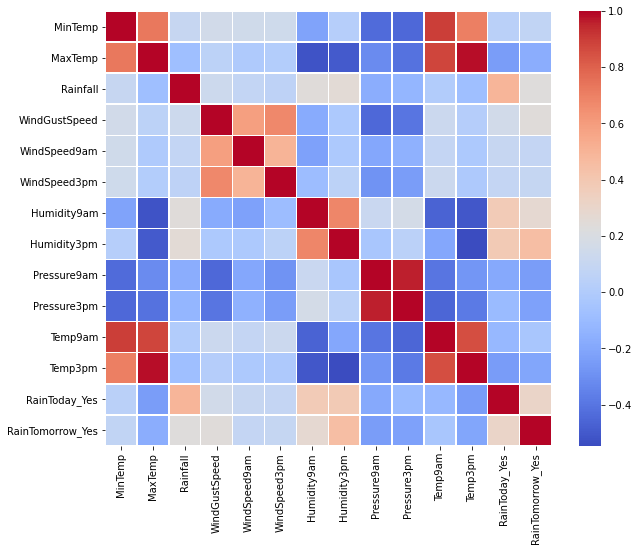

In [79]:
plt.rcParams['figure.figsize']=(10,8)
sns.heatmap(df1.corr(), linewidths=0.5, annot=False, fmt=".2f", cmap = 'coolwarm')

#### Logestic Regression

In [102]:
x=df1[['Humidity3pm']]

In [103]:
y=df1[['RainTomorrow_Yes']]

In [104]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [105]:
model= LogisticRegression(random_state=42)

In [106]:
model.fit(x_train.values.reshape(-1,1),y_train)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(random_state=42)

In [107]:
model.fit(x_train, y_train)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(random_state=42)

In [108]:
model = LogisticRegression(random_state=0)
model.fit(x_train, y_train)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(random_state=0)

In [109]:
clf = LogisticRegression(random_state=0)

In [110]:
clf.fit(x_train, y_train)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(random_state=0)

In [111]:
clf.predict(x_test)

array([0, 0, 0, ..., 0, 1, 0], dtype=uint8)

In [112]:
clf.score(x_train, y_train)

0.8298096081470002

In [113]:
clf.score(x_test, y_test)

0.8270090768208989

In [114]:
pred = clf.predict(x_test)

In [115]:
print( confusion_matrix (y_test , pred))

[[16746   778]
 [ 3129  1932]]


#### Confusion Matrix

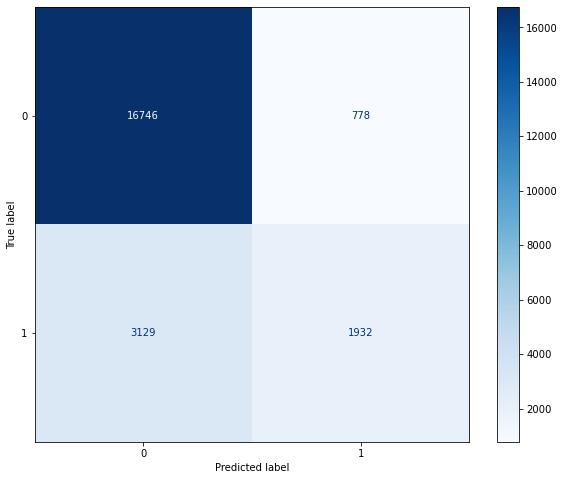

In [116]:
plt.rcParams['figure.figsize']=(10,8)
confusion_matrix = metrics.confusion_matrix(y_test,pred)
plot_confusion_matrix(model, x_test, y_test, cmap=plt.cm.Blues)

##### A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. 

##### True Positive: You predicted positive and it’s true.
##### True Negative: You predicted negative and it’s true.
##### False Positive: (Type 1 Error) You predicted positive and it’s false.
##### False Negative: (Type 2 Error) You predicted negative and it’s false.

In [117]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, pred).ravel()

In [118]:
tn, fp, fn, tp 

(16746, 778, 3129, 1932)

#### Precision

In [119]:
Precision = metrics.precision_score(y_test,pred)

In [120]:
Precision 

0.7129151291512915

Ratio of the total number of successfully classified positive classes divided by the total number of anticipated positive classes is known as precision. 

#### Recall

In [121]:
r_call = metrics.recall_score(y_test,pred)

In [122]:
r_call

0.3817427385892116

Recall is used to figure out how well the model can predict positive values. 

#### F1- Score

In [123]:
F1_Score = metrics.f1_score(y_test,pred)

In [124]:
F1_Score

0.4972333033071676

F1 Score is the harmonic mean of the two variables Recall and Precision. It's useful when you need to account for both precision and recall.

### Classification-report

In [130]:
print('Classification-Report \n',classification_report(y_test,pred))

Classification-Report 
               precision    recall  f1-score   support

           0       0.84      0.96      0.90     17524
           1       0.71      0.38      0.50      5061

    accuracy                           0.83     22585
   macro avg       0.78      0.67      0.70     22585
weighted avg       0.81      0.83      0.81     22585



#### Specificity

In [132]:
specificity = (tn) / (tn+fp)

In [133]:
specificity

0.9556037434375714

Specificity measures the proportion of negatives which are correctly identified.

#### Sensitivity

In [134]:
sensitivity = (tp)/(tp+fn)

In [135]:
sensitivity

0.3817427385892116

Sensitivity measures the proportion of actual positives which are correctly identified.

#### Misclassification Rate

In [136]:
m_rate = 1-metrics.accuracy_score(y_test,pred)

In [137]:
m_rate

0.17299092317910114

#### ROC 

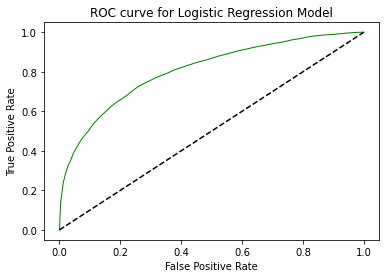

In [140]:
y_pred_logreg_proba = clf.predict_proba(x_test)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg_proba[:,1])
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,'-g',linewidth=1)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for Logistic Regression Model')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show()

 `ROC`- Receiver Operating Characteristic curve is a graph showing the performance of a classification model at all classification thresholds.

#### AUROC

In [157]:
auc = metrics.roc_auc_score(y_test,pred)
print(auc)

0.6686732410133915


The model is 66.86 % accurate.